In [153]:
import sys, os
from time import time
if '../' not in sys.path:
    sys.path.insert(0, '../')

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from modules.paths import Experiment
from modules.background import LinearCorrection, GLMCorrection, StackCorrector
from modules.io import IO

%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [154]:
# Load paths to each set of experiments
loc = '/Volumes/bernasek_t5/pnt_manuscript/microscopy/yan_clones/'
#loc = '/Users/Sebi/Desktop/clones/'
control_path = os.path.join(loc, 'control/slices/w-eyFLP_PntGFP_FRT40A_PntGFP_Ubi-mRFPnls_FRT40A')
mutant_path = os.path.join(loc, 'perturbation/slices/w-eyFLP_PntGFP_YanE833_FRT40A_PntGFP_Ubi-mRFPnls_FRT40A')
control_exp = Experiment(control_path)
perturbation_exp = Experiment(mutant_path)
experiments = dict(control=control_exp, perturbation=perturbation_exp)

In [ ]:
""" 
P-25-2 had to change percentile to 99.99 

P-46-1 is a good example
"""

# apply correction to all discs

In [14]:
# for disc_id in exp.disc_names:
#     if int(disc_id) >= 35:
#         stack = exp.discs[disc_id].load_stack()
#         try:
#             corr = StackCorrector(stack, mode='glm', niters=20, resample=True, resample_cutoff=99.999)
#             corr.save()
#         except:
#             print('FAIL: Disc {:s}'.format(stack.disc_name))        

FAIL: Disc 35


In [8]:
exp = experiments['perturbation']
for stack in exp:
    try:
        corr = StackCorrector(stack, mode='glm', niters=20, resample=True, resample_cutoff=99.999)
        corr.save()
    except:
        print('FAIL: Disc {:s}'.format(stack.disc_name))

ValueError: Unknown format code 'd' for object of type 'str'

# visualization corrections

In [453]:
exp = experiments['perturbation']
stack = exp.discs[53].load_stack()

In [454]:
corr = StackCorrector(stack, mode='glm', niters=20, resample=True, resample_cutoff=99.999)

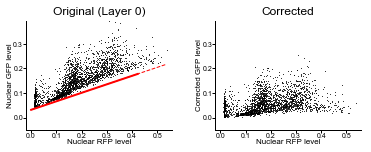

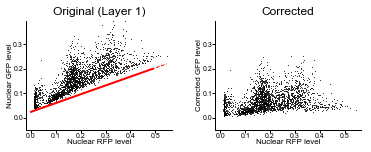

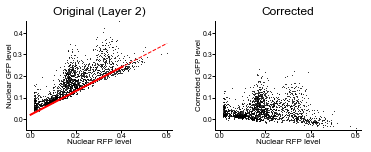

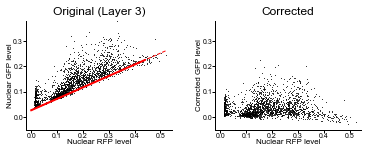

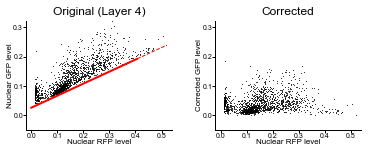

In [455]:
corr.show()

In [471]:
corr.save()

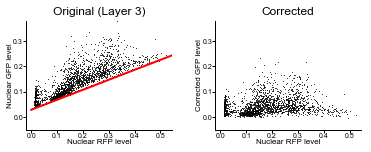

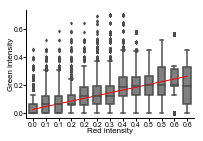

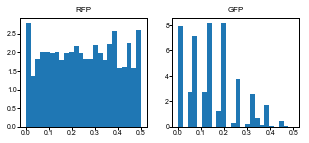

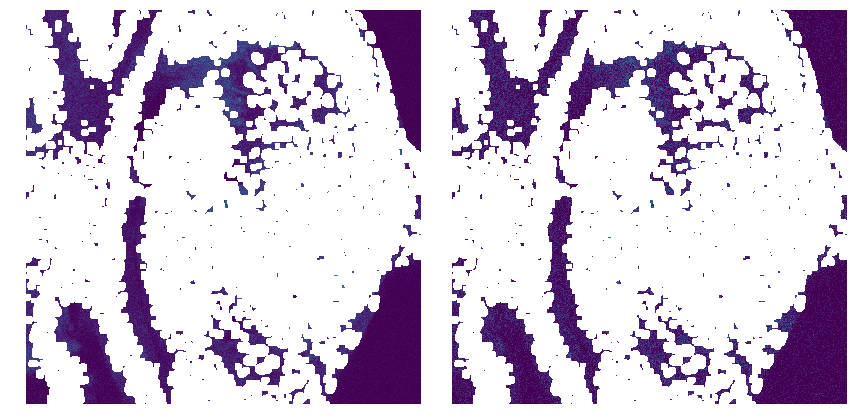

In [470]:
layer_id = 3
corr.correct(layer_id=layer_id, 
             mode='glm',
             niters=10, 
             resample=True,
             resample_cutoff=99.999)
correction = corr.corrections[layer_id]
correction.show_correction(furrow_only=False)
correction.show_fit()
fig = correction.show_pixel_distributions()
fig = correction.show_mask()

In [412]:
correction.model.params

array([0.02162233, 0.43132388])

1.4969574324430095


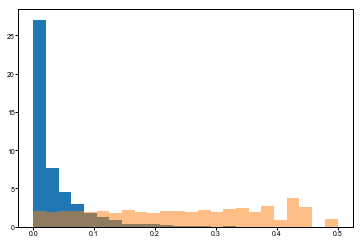

In [90]:
x = np.random.gamma(.5, .07, size=10000)
y = x

xu, yu = resample(x,y,cutoff=None)

_ = plt.hist(x, bins=np.linspace(0, 0.5, 25), density=True)
_ = plt.hist(xu, bins=np.linspace(0, 0.5, 25), alpha=0.5, density=True)

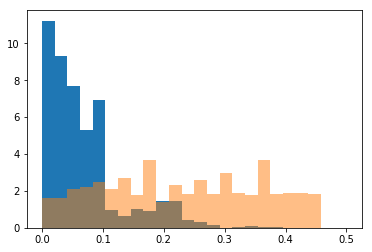

In [220]:
xx = c.bg_x
xu, yu = LinearCorrection.resample(xx, xx)
_ = plt.hist(xx, bins=np.linspace(0, 0.5, 25), density=True)
_ = plt.hist(xu, bins=np.linspace(0, 0.5, 25), alpha=0.5, density=True)

In [ ]:

xunique = np.unique(xx)
adict = dict(zip(xunique[:-1], np.diff(xunique)))

In [212]:
print(xx.max())

0.45654296875


In [213]:
print(intervals.sum())

0.44189453125


In [163]:
from collections import Counter

# manually apply to single disc

In [4]:
exp = experiments['control']
stack = exp[0]
seg_params = stack.load_metadata()['params']['segmentation_kw']
layer = stack[0]

/Users/Sebi/.virtualenvs/clones/lib/python3.6/site-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/Users/Sebi/.virtualenvs/clones/lib/python3.6/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


In [ ]:
layer.la

In [103]:
from modules.background import LinearCorrection, GLMCorrection

In [106]:
fit_kw = dict(shift=0, N=10000)
correction = GLMCorrection(layer, niters=25, 
                              remove_zeros=True, resample=True, 
                                  seg_params=seg_params, **fit_kw)

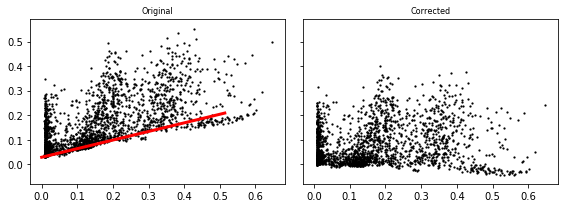

In [107]:
correction.show_correction()

/Users/Sebi/.virtualenvs/clones/lib/python3.6/site-packages/statsmodels/genmod/generalized_linear_model.py:302: DomainWarning: The identity link function does not respect the domain of the Gamma family.
  DomainWarning)


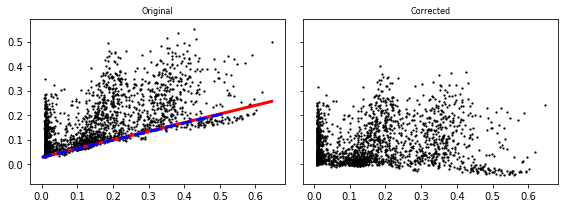

In [77]:
correction.show_correction()
fig = plt.gcf()
ax = fig.axes[0]

# add GLM prediction
shift = 0
kw = dict(start_params=[0.1+shift, 0.5], maxiter=500, method='IRLS')
glm = correction.fit_GLM(correction.bg_x, correction.bg_y+shift, N=10000, **kw)
yp_glm = glm.predict(correction.glm_xbins)
ax.plot(correction.xbins, yp_glm-shift, '--b', lw=3)

In [79]:
from scipy.stats import linregress

In [83]:
sm.OLS.fit

statsmodels.regression.linear_model.OLS

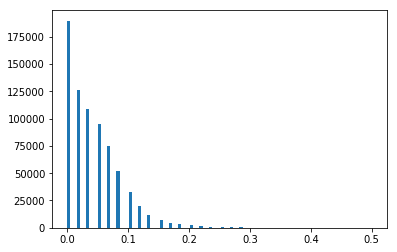

In [18]:
_ = plt.hist(correction.xx[~correction.xx.mask], bins=np.linspace(0, .5, 100))

In [41]:
from scipy.ndimage.measurements import mean

In [47]:
r = layer.get_channel('r').im
g = layer.get_channel('g').im

nonzero_ind = np.logical_and(r!=0, g!=0).nonzero()
label_mask = np.zeros_like(layer.labels)
label_mask[nonzero_ind] = layer.labels[nonzero_ind]
unique_labels = np.unique(layer.labels[nonzero_ind])

r_measurements = mean(r, label_mask, index=unique_labels)
g_measurements = mean(g, label_mask, index=unique_labels)

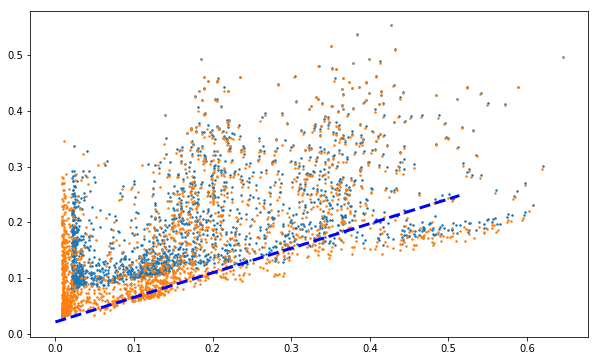

In [48]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(r_measurements, g_measurements, '.', markersize=3)
ax.plot(layer.df['r'], layer.df['g'], '.', markersize=3)
ax.plot(correction.xbins, yp_glm-shift, '--b', lw=3)

In [932]:
layer.df.id.unique().size

1950

In [834]:
sm.genmod.families.links.sqrt()

In [741]:
def resample(x, y, size=None):
    """ Resample uniformly in X. """

    if size is None:
        size = x.size
    
    # sort values
    sort_ind = np.argsort(x)
    xx, yy = x[sort_ind], y[sort_ind]
        
    # get probabilities
    xunique = np.unique(xx)
    adict = dict(zip(xunique[:-1], np.diff(xunique)))
    p = np.vectorize(adict.get)(xx[:-1])
    p /= p.sum()
    
    # generate sample
    sample_ind = np.random.choice(np.arange(xx.size-1), size=size, p=p)
    xu, yu = xx[sample_ind], yy[sample_ind]

    return xu, yu

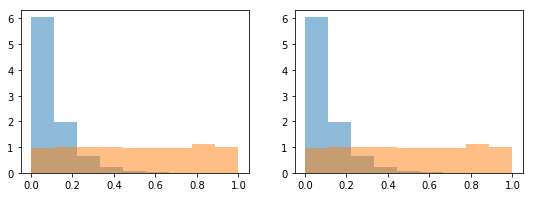

In [742]:
bins = np.linspace(0, 1, 10)

x = np.random.gamma(1, 0.1, size=100000)
y = x
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(9, 3))
_ = ax0.hist(x, bins=bins, normed=True, alpha=0.5)
_ = ax1.hist(y, bins=bins, normed=True, alpha=0.5)

xu, yu = resample(x, y, size=None)
_ = ax0.hist(xu, bins=bins, normed=True, alpha=0.5)
_ = ax1.hist(yu, bins=bins, normed=True, alpha=0.5)

In [743]:
xu.min()

1.68266749931208e-05

In [744]:
x.min()

2.959122697134056e-07

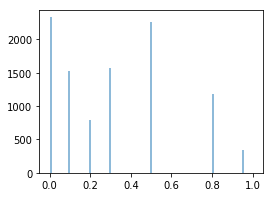

In [693]:
bins = np.linspace(0, 1, 100)
fig, ax = plt.subplots(figsize=(4, 3))
_ = ax.hist(sample, bins=bins, alpha=0.5)

array([0.5, 0.1, 0. , ..., 0.8, 0.8, 0.5])

In [690]:
np.arange(x.size)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

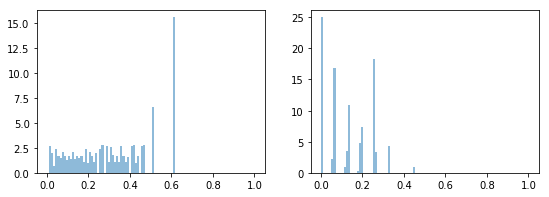

In [228]:
# resampling
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(9, 3))
_ = ax0.hist(correction.bg_x, bins=np.linspace(0, 1, 100), normed=True, alpha=0.5)
_ = ax1.hist(correction.bg_y, bins=np.linspace(0, 1, 100), normed=True, alpha=0.5)

In [229]:
glm.f

array([3.28608993e-31, 3.28934653e-31, 3.29260313e-31, 3.29585973e-31,
       3.29911634e-31, 3.30237294e-31, 3.30562954e-31, 3.30888614e-31,
       3.31214275e-31, 3.31539935e-31])

In [ ]:
def resample(x, y, size=100000, xmax='max'):
    """ Resample uniformly in X. """
    sort_ind = np.argsort(x)
    xx, yy = x[sort_ind], y[sort_ind]
    xmin = 0
    if xmax is None:
        xmax = np.percentile(xx, q=99.99)
    elif type(xmax) == str:
        xmax = xx.max()
    sample = lambda x: xmin + ((xmax-xmin) * x)
    samples = np.searchsorted(xx, sample(np.random.random(size=size)))
    xu, yu = xx[samples], yy[samples]
    return xu, yu

# correction design

In [97]:
exp = experiments['control']
stack = exp[5]
layer = stack[0]

In [ ]:
# figure out why some layers are over-correcting, try segmentating each image first

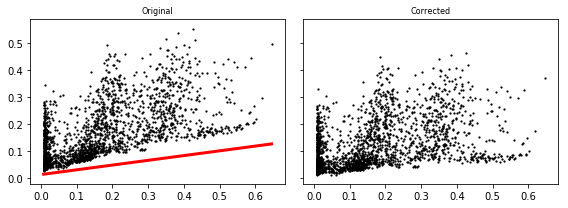

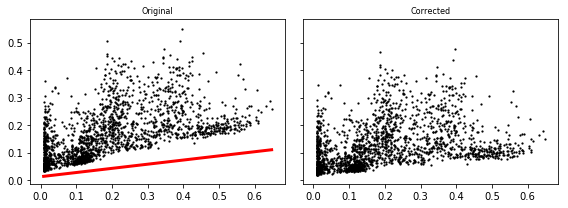

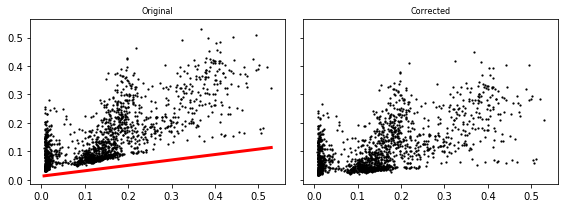

In [152]:
dfs = []
for stack in exp:
    for layer in stack:
        corr = BackgroundCorrection(layer, niters=50, xmax=1, ymax=0.1)
        corr.show_correction(lambda c: c.y-c.yp)
        layer.df['gp'] = corr.yp
        dfs.append(layer.df)
    break

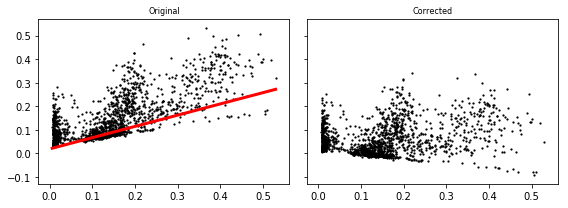

In [166]:
corr = BackgroundCorrection(layer, niters=50, xmax=1, ymax=1)
corr.show_correction(lambda c: c.y-c.yp)

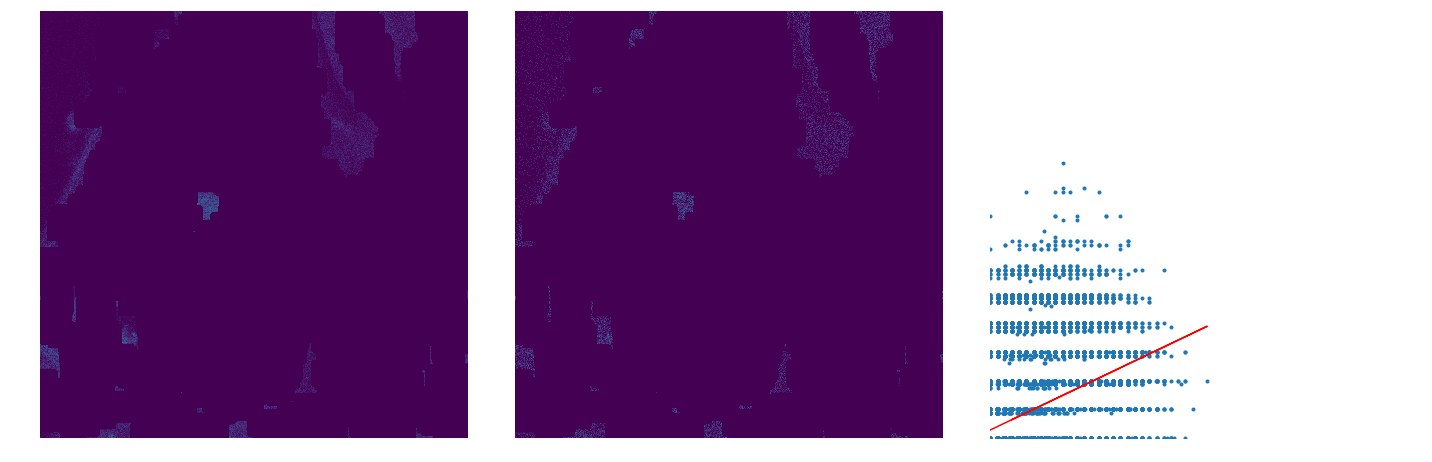

In [167]:
g = layer.get_channel('g')
r = layer.get_channel('r')
fig, (ax0, ax1, ax2) = plt.subplots(ncols=3, figsize=(20, 8))

r_bg = np.zeros_like(r.im)
r_bg[corr.bg_mask] = r.im[corr.bg_mask]
_ = ax0.imshow(r_bg, cmap=plt.cm.viridis, vmin=0, vmax=1)

g_bg = np.zeros_like(g.im)
g_bg[corr.bg_mask] = g.im[corr.bg_mask]
_ = ax1.imshow(g_bg, cmap=plt.cm.viridis, vmin=0, vmax=1)

x = r.im[corr.bg_mask]
y = g.im[corr.bg_mask]
ind = np.argsort(x)
ax2.plot(x[ind], y[ind], '.')
ax2.set_xlim(0, 1)
ax2.set_ylim(0, 1)
ax2.set_aspect(1)

ax2.plot(x, corr.m*x + corr.b, '-r')

for ax in (ax0, ax1, ax2):
    ax.axis('off')
plt.tight_layout()

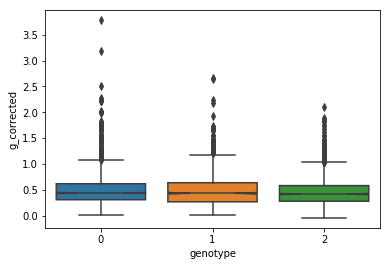

In [103]:
df = pd.concat(dfs)
df['g_corrected'] = (df.g-df.gp)/df.b
df = df[df.near_furrow]
import seaborn as sns
sns.boxplot(x='genotype', y='g_corrected', order=(0,1,2), data=df, notch=True)

In [104]:
len(df)

5395

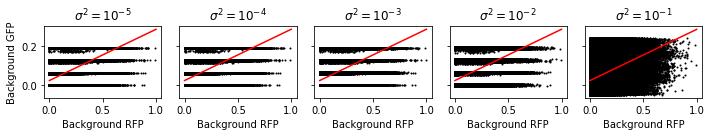

In [98]:
x_raw, y_raw = bg_correction.bg_x, bg_correction.bg_y
m_raw, b_raw = bg_correction.m, bg_correction.b

fig, axes = plt.subplots(ncols=5, sharey=True, figsize=(10, 2))

regs = []
for i in range(5):
    ax = axes[i]
    
    scale = 10**(-5+i)    
    #noise = np.random.normal(0, scale=scale, size=y_raw.size)
    noise = np.random.uniform(-.5, high=.5, size=y_raw.size) * scale
    
    y_noisy = y_raw + noise

    ax.plot(x_raw, y_noisy, '.k', markersize=2)

    reg = linregress(x_raw, y_noisy)
    regs.append(reg)
    ax.set_title('$\sigma^2=10^{{{:d}}}$'.format(int(np.log10(scale))))
    
    xx = np.linspace(0, 1, 10)
    ax.plot(xx, reg.slope*xx+reg.intercept, '-r')

# ax = axes[-1]    
# for reg in regs:
#     ax.plot(xx, reg.slope*xx+reg.intercept, '-')
# ax.plot(xx, m_raw*xx+b_raw, '--r')

axes[0].set_ylabel('Background GFP')
for ax in axes:
    ax.set_xlabel('Background RFP')
    

plt.tight_layout()

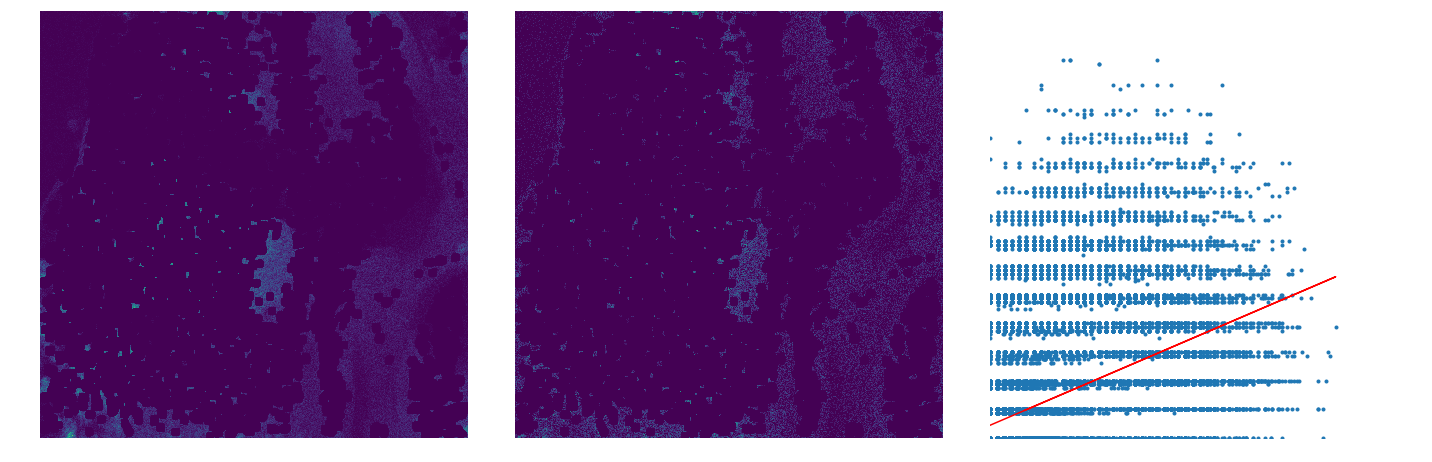

In [69]:
g = layer.get_channel('g')
r = layer.get_channel('r')
fig, (ax0, ax1, ax2) = plt.subplots(ncols=3, figsize=(20, 8))

r_bg = np.zeros_like(r.im)
r_bg[corr.bg_mask] = r.im[corr.bg_mask]
_ = ax0.imshow(r_bg, cmap=plt.cm.viridis, vmin=0, vmax=1)

g_bg = np.zeros_like(g.im)
g_bg[corr.bg_mask] = g.im[corr.bg_mask]
_ = ax1.imshow(g_bg, cmap=plt.cm.viridis, vmin=0, vmax=1)


x = r.im[corr.bg_mask]
y = g.im[corr.bg_mask]
ind = np.argsort(x)
ax2.plot(x[ind], y[ind], '.')
ax2.set_xlim(0, 1)
ax2.set_ylim(0, 1)
ax2.set_aspect(1)

ax2.plot(x, corr.m*x + corr.b, '-r')

for ax in (ax0, ax1, ax2):
    ax.axis('off')
plt.tight_layout()

(0, 1)

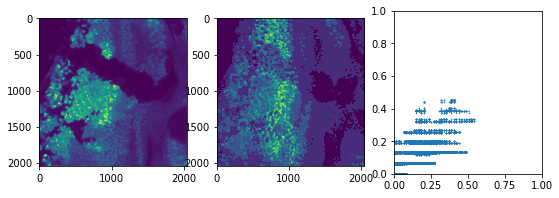

In [81]:
fig, (ax0, ax1, ax2) = plt.subplots(ncols=3, figsize=(9, 3))
s=25
rsmooth = ndimage.median_filter(r.im, size=s)
gsmooth = ndimage.median_filter(g.im, size=s)

ax0.imshow(rsmooth)
ax1.imshow(gsmooth)

x = rsmooth[corr.bg_mask]
y = gsmooth[corr.bg_mask]
ind = np.argsort(x)
ax2.plot(x[ind], y[ind], '.', markersize=1)
ax2.set_xlim(0, 1)
ax2.set_ylim(0, 1)


In [56]:
from scipy import ndimage

In [874]:
from modules.background import StackCorrection

In [875]:
exp = experiments['perturbation']

0 0.496826171875
0 0.496826171875
0 0.496826171875
0 0.496826171875
0 0.490234375
0 0.496826171875
0 0.496826171875
0 0.496826171875
0 0.496826171875
0 0.496826171875
0 0.496826171875
0 0.496826171875
0 0.490234375
0 0.496826171875
0 0.490478515625
0 0.496826171875
0 0.490478515625
0 0.496826171875
0 0.496826171875
0 0.49644721679624126
0 0.490478515625
0 0.490234375
0 0.496826171875
0 0.490478515625
0 0.496826171875
0 0.496826171875
0 0.496826171875
0 0.496826171875
0 0.496826171875
0 0.490234375
0 0.490234375
0 0.490234375
0 0.490234375
0 0.47998046875
0 0.490478515625
0 0.439697265625
0 0.463134765625
0 0.490234375
0 0.490478515625
0 0.490234375
0 0.490234375
0 0.473388671875


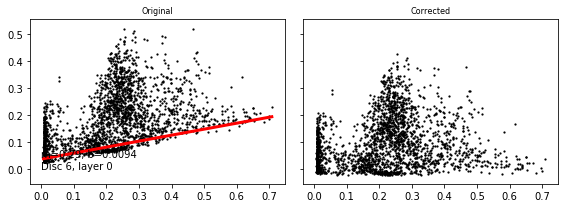

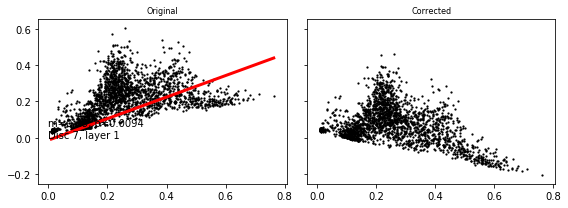

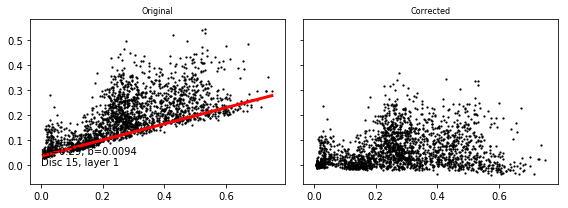

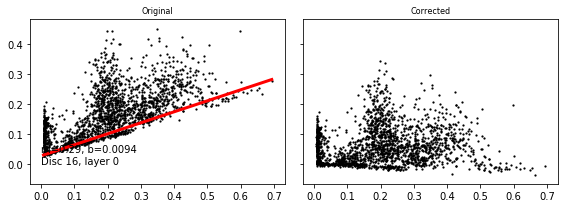

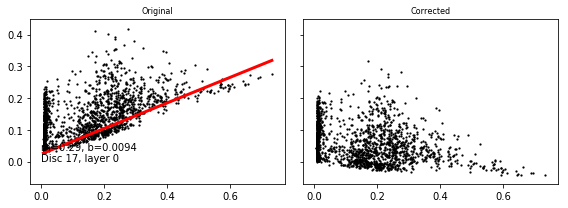

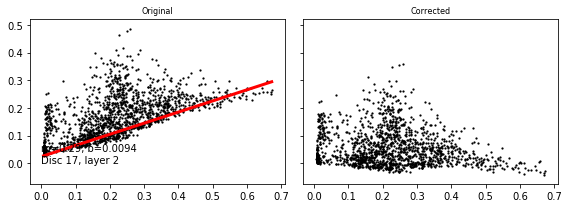

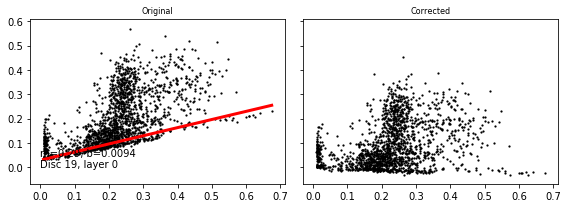

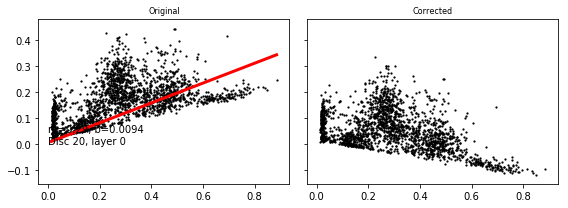

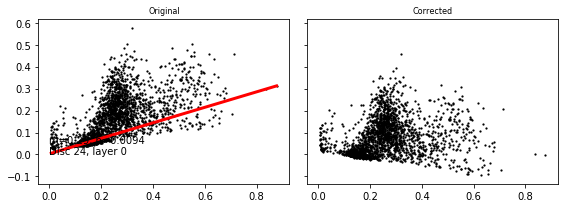

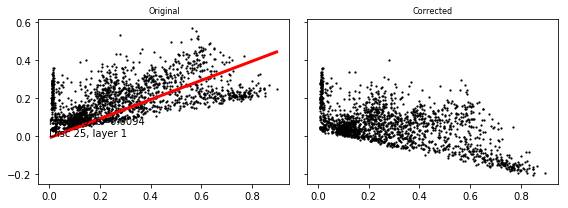

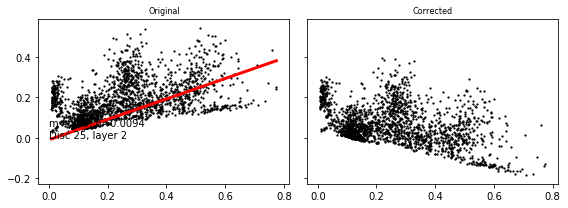

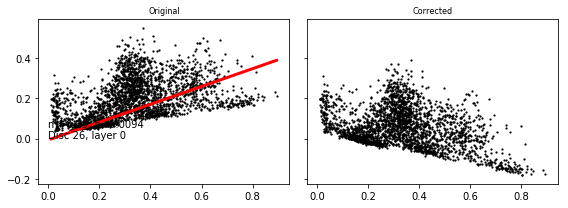

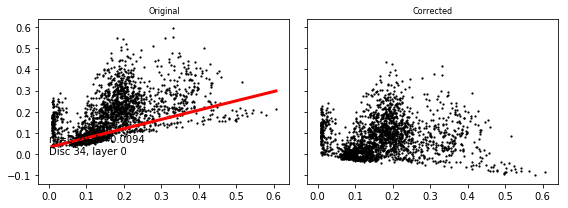

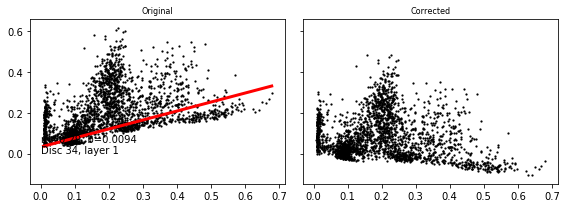

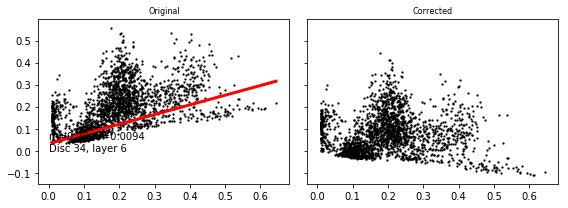

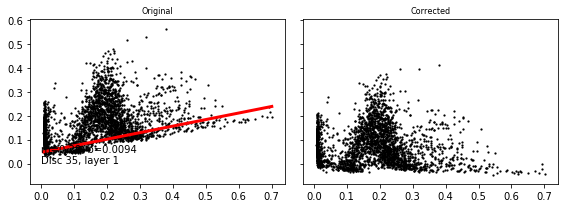

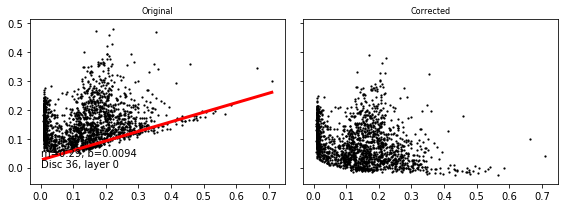

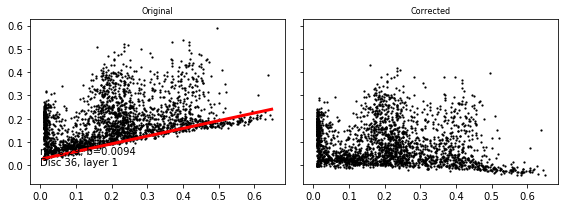

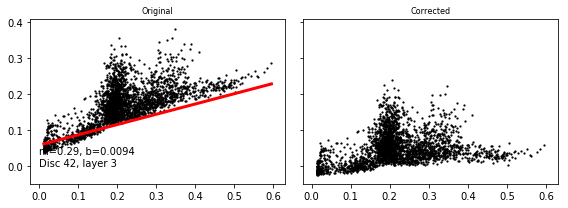

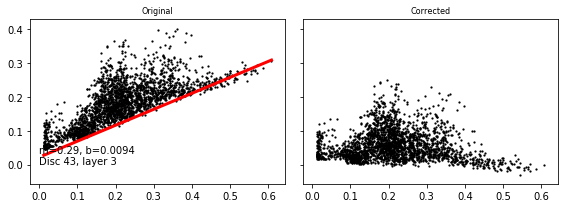

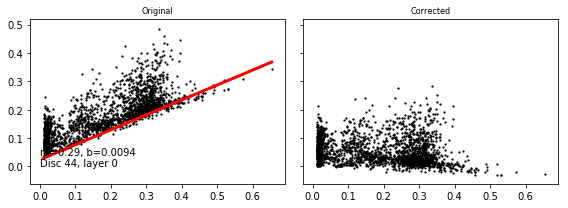

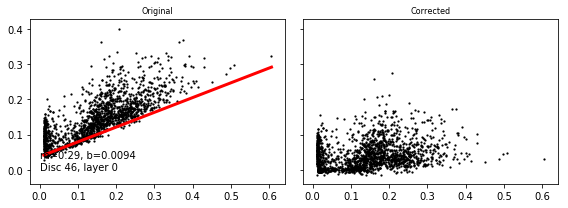

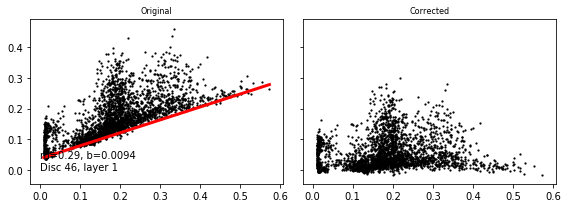

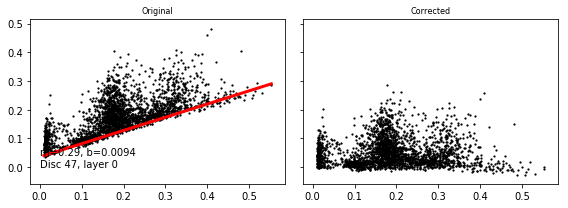

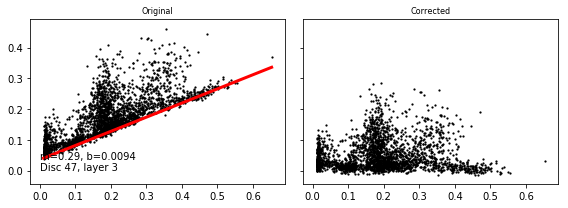

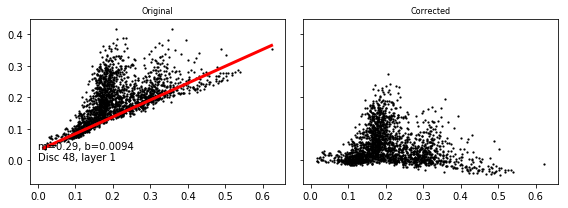

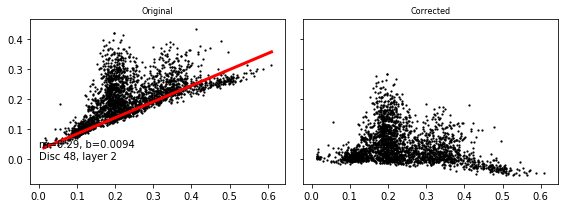

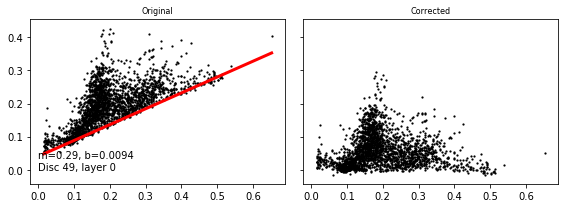

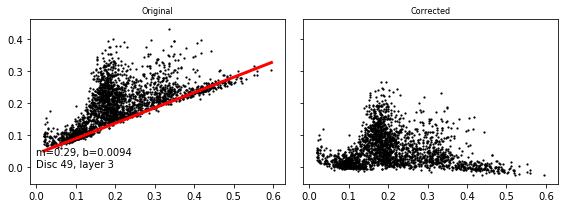

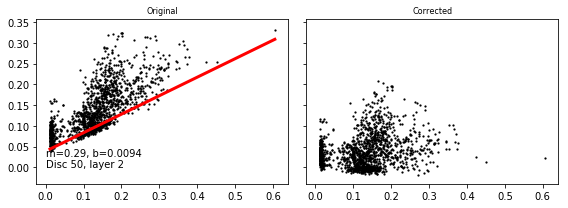

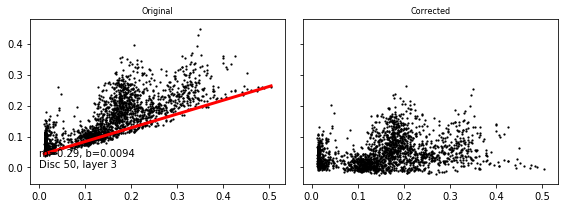

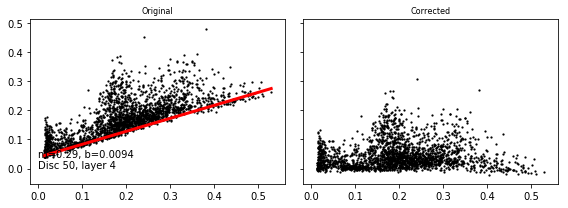

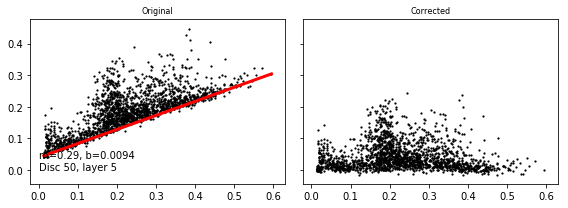

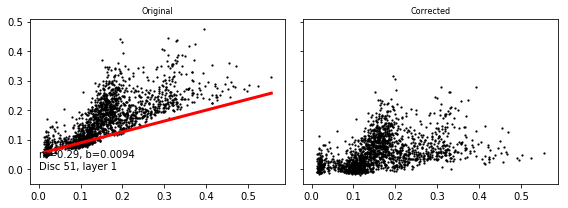

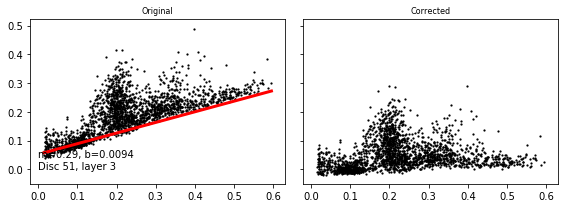

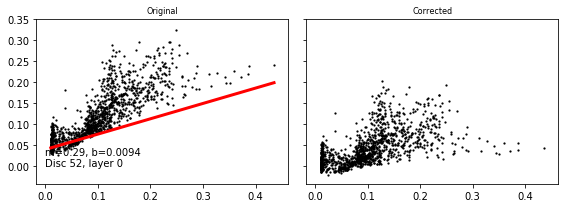

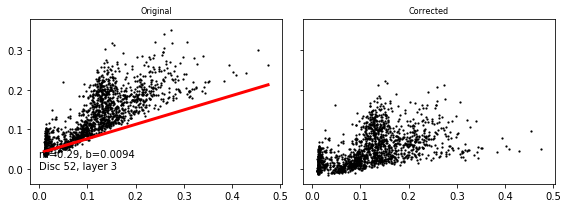

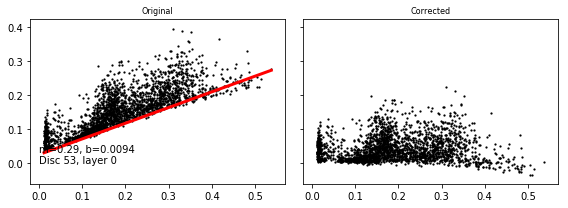

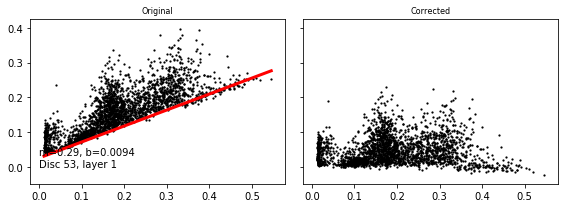

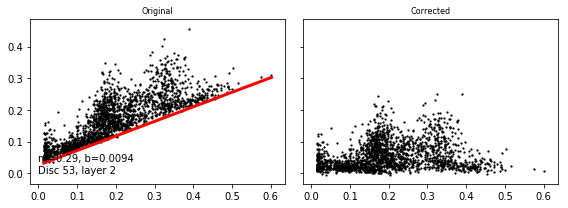

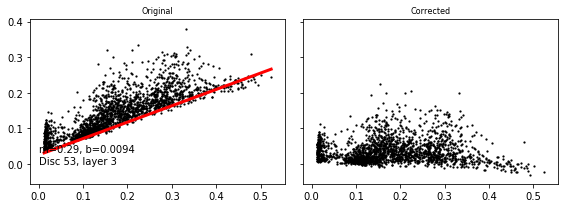

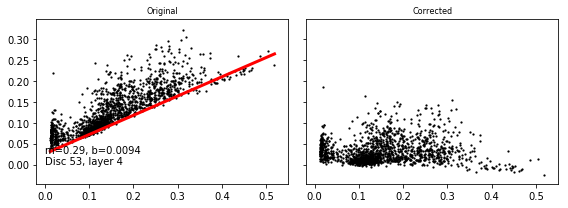

In [922]:
for stack in exp:
    correction = StackCorrection(stack, niters=5, xmax=0.5, ymax=1, remove_zeros=True, resample=True)    
    for layer in stack:
        if layer.include:
            correction.show_correction(layer)
            fig = plt.gcf()
            fig.axes[0].text(0, 0, 'm={:0.2f}, b={:0.4f}\nDisc {}, layer {}'.format(corr.m, corr.b, stack.disc_name, layer.layer_id))

In [923]:
exp.disc_names.index(25)

8

In [924]:
from modules.background import StackCorrection
stack = exp[8]
print(stack.disc_name)
correction = StackCorrection(stack, niters=5, xmax=0.5, ymax=1, remove_zeros=True, resample=True)    

25
0 0.496826171875
0 0.496826171875


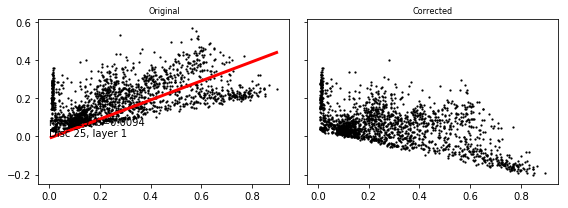

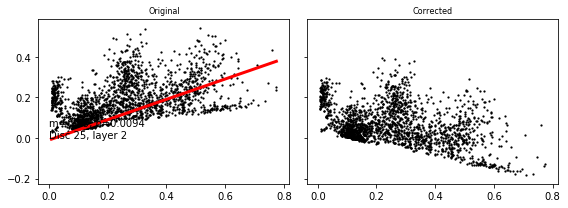

In [925]:
for layer in stack:
    if layer.include:
        correction.show_correction(layer)
        fig = plt.gcf()
        fig.axes[0].text(0, 0, 'm={:0.2f}, b={:0.4f}\nDisc {}, layer {}'.format(corr.m, corr.b, stack.disc_name, layer.layer_id))

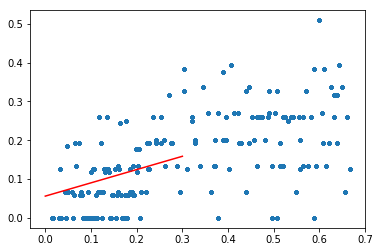

In [918]:
plt.plot(correction.bg_x, correction.bg_y, '.')
xx = np.linspace(0, 0.3)
yy = correction.m*xx+correction.b
plt.plot(xx,yy,'-r')

In [805]:
from modules.background import StackCorrection
stack2 = exp[6]
correction2 = StackCorrection(stack2, niters=50, xmax=1, ymax=1, remove_zeros=True, resample=True)   

0.016845703125 0.338134765625 0.029541015625 0.338134765625


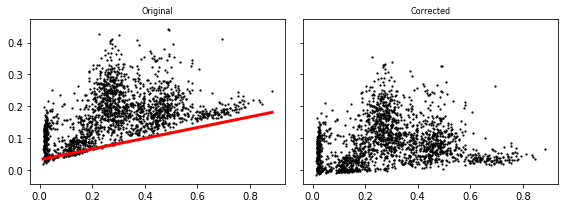

In [806]:
for layer2 in stack2:
    if layer2.include:
        correction2.show_correction(layer2)

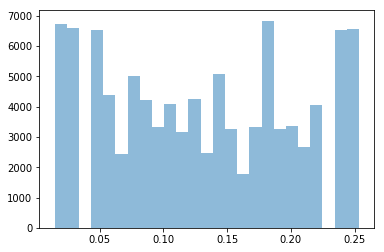

In [904]:
_ = plt.hist(correction.bg_x, bins=25, alpha=0.5)
#_ = plt.hist(correction2.bg_x, bins=25, alpha=0.5)

In [899]:
correction_raw = StackCorrection(stack, niters=25, xmax=1, ymax=1, remove_zeros=True, resample=False)   
#correction2_raw = StackCorrection(stack2, niters=10, xmax=1, ymax=1, remove_zeros=True, resample=False)   

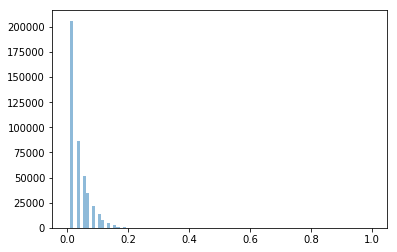

In [903]:
_ = plt.hist(correction_raw.bg_x, bins=np.linspace(0, 1, 100), alpha=0.5)
#_ = plt.hist(correction2_raw.bg_x, bins=np.linspace(0, 1, 100), alpha=0.5)

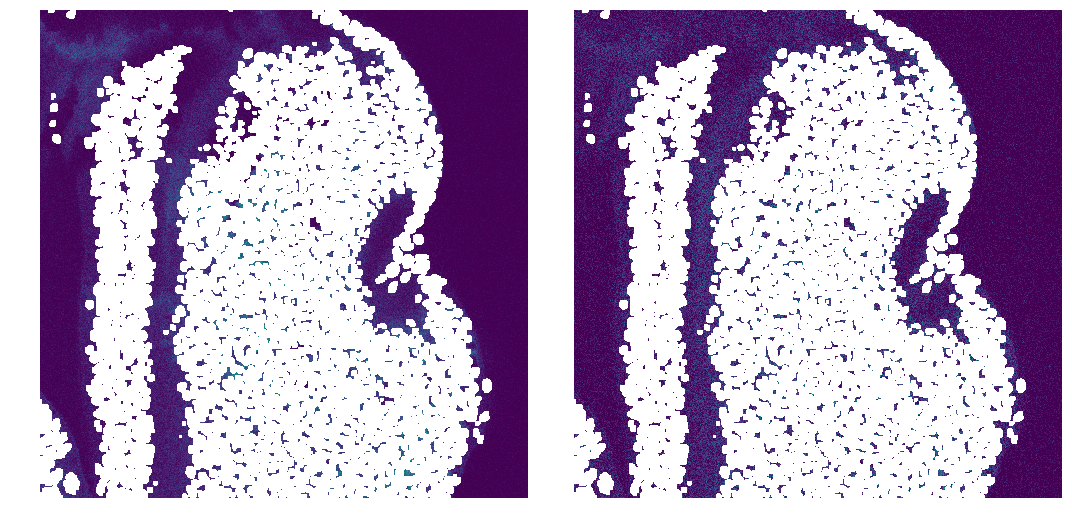

In [919]:
_ = correction.show(layer)
#_ = correction2.show(layer2)

In [888]:
correction.bg_x

array([0.15625   , 0.13085938, 0.20947266, ..., 0.05908203, 0.13305664,
       0.07592773])

In [729]:
corr.m

0.2909770703388219

In [730]:
corr_b.m

0.44668084570543687

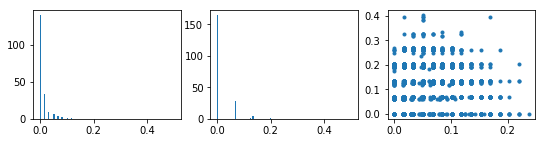

In [360]:
bins = np.linspace(0, .5, 100)
fig, (ax0, ax1, ax2) = plt.subplots(ncols=3, figsize=(9, 2))
_ = ax0.hist(corr.bg_x, bins=bins, normed=True)
_ = ax1.hist(corr.bg_y, bins=bins, normed=True)
_ = ax2.plot(corr.bg_x, corr.bg_y, '.')

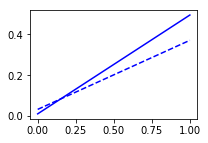

In [465]:
x = np.linspace(0, 1, 10)
fig, ax = plt.subplots(figsize=(3, 2))
ax.plot(x, corr.m*x+corr.b, '-b')



AttributeError: 'LinregressResult' object has no attribute 'm'

In [447]:
xu, yu = resample(corr, 100000)
line = linregress(xu, yu)
mu, bu = line.slope, line.intercept
ax.plot(x, mu*x+bu, '--b')

def resample(corr, size=100000):
    x, y = corr.bg_x, corr.bg_y
    sort_ind = np.argsort(x)
    xx,yy = x[sort_ind], y[sort_ind]
    ind = np.random.random(size=size) * xx.max()
    samples = np.searchsorted(xx, ind)
    xuniform, yuniform = xx[samples], yy[samples]
    return xuniform, yuniform

In [3]:
exp = experiments['perturbation']

In [235]:
exp.disc_names.index(21)

ValueError: 21 is not in list

In [236]:
from modules.background import TestCorrection
stack = exp[2]
correction = TestCorrection(stack, niters=10, xmax=1, ymax=1, remove_zeros=False, resample=True) 

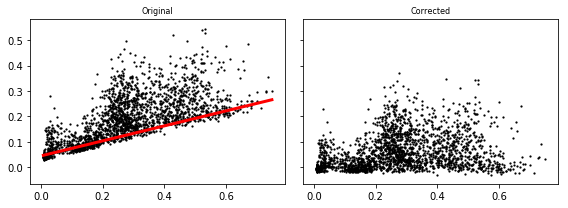

In [237]:
for layer in stack:
    if layer.include:
        correction.show_correction(layer)

In [248]:
niters = 20
xmax = 1
ymax = 1

kw = dict(xmax = 'max')

bg_x, bg_y = [], []
for layer in stack:
    if layer.include:
        bg_mask = correction.get_bg_mask(layer, niters)
        xx, yy = correction.extract_pixels(layer, bg_mask,
                                   xvar='r', yvar='g',
                                   xmax=xmax, ymax=ymax,
                                   smooth=False)

        x, y = correction.filter_pixels(xx[~xx.mask].data, yy[~yy.mask].data,
                           remove_zeros=False,
                            resample=True, **kw)
        bg_x.append(x)
        bg_y.append(y)

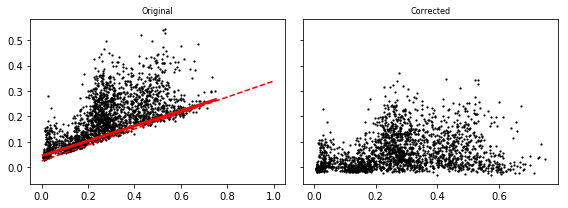

In [249]:
m, b = correction.fit_line(np.hstack(bg_x), np.hstack(bg_y))
correction.show_correction(layer)
fig = plt.gcf()
ax0 = fig.axes[0]
xs = np.linspace(0, 1, 100)
ax0.plot(xs, m*xs+b, '--r')

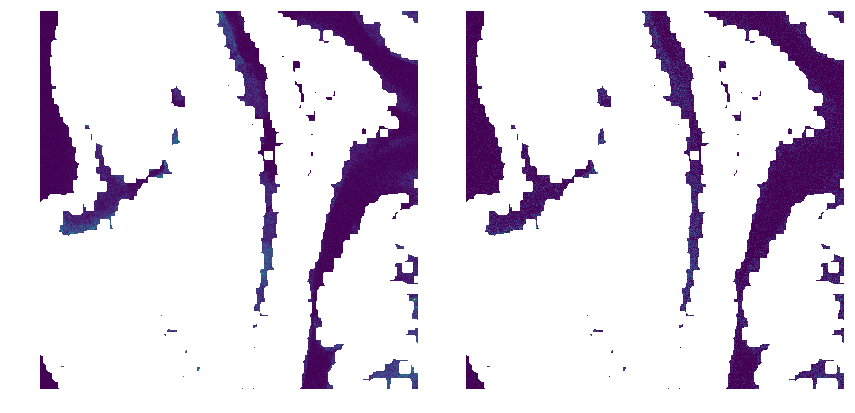

In [250]:
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(12, 6))

cmap = plt.cm.viridis
cmap.set_bad('w')
ax0.imshow(xx, cmap=cmap, vmin=0, vmax=1)
ax1.imshow(yy, cmap=cmap, vmin=0, vmax=1)

for ax in (ax0, ax1):
    ax.axis('off')
plt.tight_layout()

(0, 0.4)

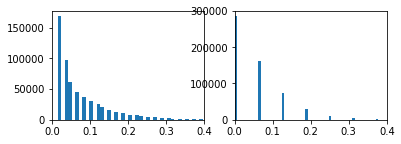

In [252]:
xraw = xx[~xx.mask].data
yraw = yy[~yy.mask].data
xraw_nonzero = xraw[xraw!=0]
yraw_nonzero = yraw[xraw!=0]

fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(6, 2))
_ = ax0.hist(xraw_nonzero, bins=100)
ax0.set_xlim(0, 0.4)
_ = ax1.hist(yraw_nonzero, bins=100)
ax1.set_xlim(0, 0.4)

(0, 0.5)

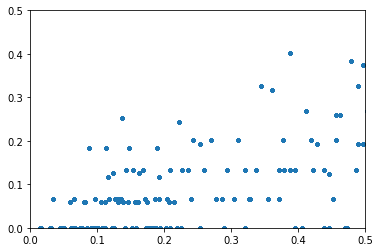

In [76]:
fig, ax = plt.subplots()
ax.plot(x, y, '.')
ax.set_xlim(0, .5)
ax.set_ylim(0, .5)

In [55]:
x

masked_array(data=[0.152099609375, 0.1181640625, 0.260009765625, ...,
                   0.260009765625, 0.321044921875, 0.0146484375],
             mask=[False, False, False, ..., False, False, False],
       fill_value=1e+20)

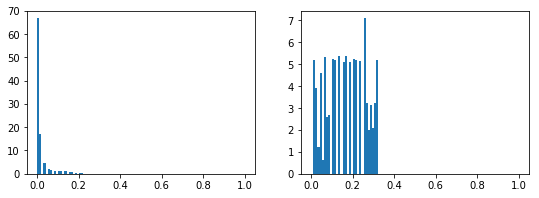

In [45]:
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(9, 3))

bins = np.linspace(0, 1, 100)
_ = ax0.hist(xx[~xx.mask].data, bins, normed=True)
_ = ax1.hist(x.flatten().data, bins, normed=True)

In [57]:
unfiltered_xvals = xx[~xx.mask].data
np.percentile(unfiltered_xvals, 99)

0.185791015625

In [64]:
unfiltered_xvals[unfiltered_xvals!=0]

array([0.0168457, 0.0168457, 0.0168457, ..., 0.0168457, 0.0168457,
       0.0168457])

In [32]:
xraw, yraw = correction.filter_pixels(xx[~xx.mask].data, yy[~yy.mask].data,
                           remove_zeros=True,
                            resample=False)

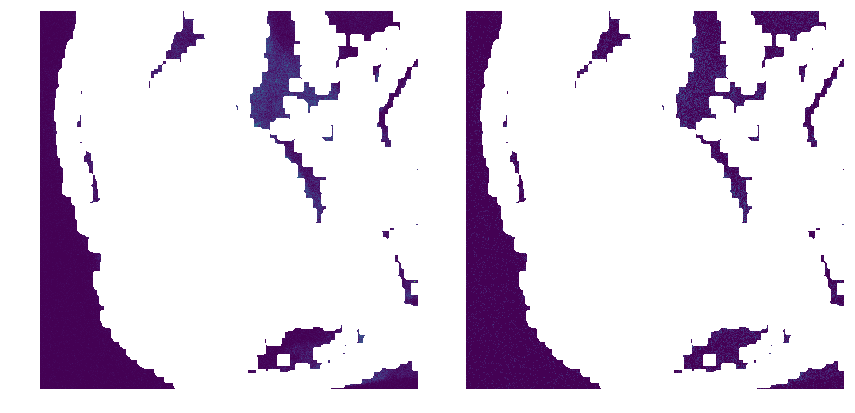

In [49]:
xx == 0

masked_array(
  data=[[True, True, True, ..., --, --, --],
        [False, True, False, ..., --, --, --],
        [True, True, True, ..., --, --, --],
        ...,
        [True, False, True, ..., True, True, True],
        [True, True, True, ..., False, True, True],
        [True, True, True, ..., True, True, False]],
  mask=[[False, False, False, ...,  True,  True,  True],
        [False, False, False, ...,  True,  True,  True],
        [False, False, False, ...,  True,  True,  True],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]],
  fill_value=1e+20)